#### IMPORTING LIBRARIES

In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.callbacks import ModelCheckpoint
import pandas as pd

#### IMPORTING DATASET

In [2]:
base_dir = "D:/PROJECTS/LEAF DISEASE DETECTION/New Plant Diseases Dataset(Augmented)"
image_size = 224

#### DATA GENERATION

In [6]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
batch_size = 32
train_data = train_datagen.flow_from_directory(os.path.join(base_dir,"valid"),
                                               target_size=(image_size,image_size),
                                               batch_size=batch_size,
                                               class_mode="categorical"                                               
                                              )

Found 17572 images belonging to 38 classes.


In [7]:
train_data.image_shape

(224, 224, 3)

In [8]:
base_model = keras.applications.MobileNet(weights="imagenet",include_top=False,input_shape=(image_size,image_size,3))

17227776/17225924 [==============================] - 6s 0us/step


#### TRAINING THE MODEL

In [10]:
base_model.trainable = False
inputs = keras.Input(shape=(image_size,image_size,3))
x = base_model(inputs,training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
categories = list(train_data.class_indices.keys())
x = keras.layers.Dense(len(categories),activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=x, name="LeafDisease_MobileNet")

In [13]:
optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit_generator(train_data,
          validation_data=test_data,
          epochs=25,
          steps_per_epoch=150,
          validation_steps=100)

Epoch 1/25
150/150 [==============================] - 236s 2s/step - loss: 3.3429 - categorical_accuracy: 0.4053 - val_loss: 3.0593 - val_categorical_accuracy: 0.7044
Epoch 2/25
150/150 [==============================] - 144s 957ms/step - loss: 3.0137 - categorical_accuracy: 0.7316 - val_loss: 2.9445 - val_categorical_accuracy: 0.7844
Epoch 3/25
150/150 [==============================] - 92s 614ms/step - loss: 2.9377 - categorical_accuracy: 0.7827 - val_loss: 2.9096 - val_categorical_accuracy: 0.8106
Epoch 4/25
150/150 [==============================] - 61s 409ms/step - loss: 2.9077 - categorical_accuracy: 0.8067 - val_loss: 2.8834 - val_categorical_accuracy: 0.8297
Epoch 5/25
150/150 [==============================] - 46s 303ms/step - loss: 2.8786 - categorical_accuracy: 0.8323 - val_loss: 2.8663 - val_categorical_accuracy: 0.8378
Epoch 6/25
150/150 [==============================] - 32s 210ms/step - loss: 2.8700 - categorical_accuracy: 0.8371 - val_loss: 2.8506 - val_categorical_accu

In [14]:
model.evaluate(test_data)

550/550 [==============================] - 61s 112ms/step - loss: 2.7663 - categorical_accuracy: 0.9249


[2.7663016319274902, 0.9248805046081543]

### ACCURACY == 92.5%

In [19]:
model.save('plant_desease.h5')

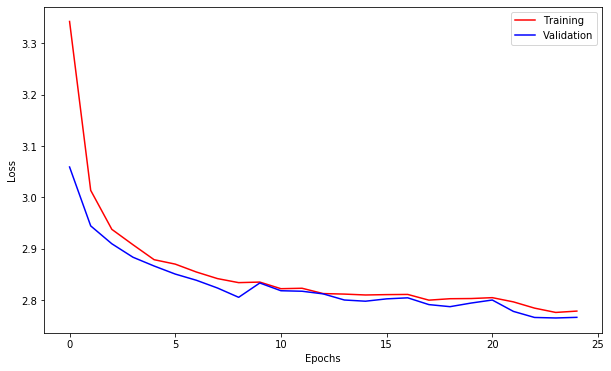

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

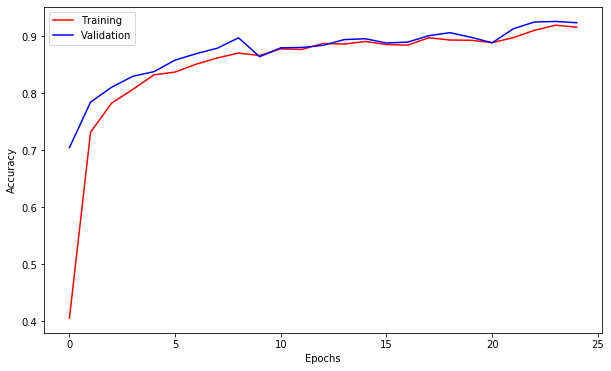

In [16]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()